In [37]:
from scholars import *
X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X_test = np.genfromtxt('data/X_test.txt', delimiter=',')
X, Y = ml.shuffleData(X, Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75) 
np.random.seed(0)

In [38]:
def stackPredictions(predictions):
    num_data = len(predictions[0])
    finalPrediction = [0]*num_data
    for j in range(num_data):
        finalPrediction[j] = np.mean(np.array(predictions)[:, j])
    return finalPrediction


def convertToFinalPredictions(pred):
    final_pred = []
    for i in pred:
        if i>0.5:
            final_pred.append(1)
        else:
            final_pred.append(0)

    return final_pred

In [39]:
#TRAINS LEARNER
gradientBoostTR = GradientBoost(Xtr,Ytr)
logistic41featuresTR = LogisticRegression().fit(Xtr[:,:41],Ytr)
adaBoosTR = AdaBoost(Xtr,Ytr, learning_rate=2)
gradientBoost2TR = GradientBoost2(Xtr,Ytr)
randomForestTR = RandomForest(Xtr,Ytr,nFeatures = 50, maxDepth = 15, minLeaf = 4, number_of_learner=25)
randomForest2TR = RandomForest2(Xtr,Ytr)
knn28categoricalTR = ml.knn.knnClassify(Xtr[:,41:69],Ytr)
gradient12Boost2TR = GradientBoost2(Xtr[:,:69], Ytr)
gradient23Boost2TR = GradientBoost2(Xtr[:,41:], Ytr)
newXtr = np.hstack((Xtr[:,:41],Xtr[:,69:]))    
gradient13Boost2TR = GradientBoost2(newXtr, Ytr)

gradientBoost = GradientBoost(X,Y)
logistic41features = LogisticRegression().fit(X[:,:41],Y)
knn28categorical = ml.knn.knnClassify(X[:,41:69],Y)
adaBoost = AdaBoost(X,Y, learning_rate=2)
gradientBoost2 = GradientBoost2(X,Y)
randomForest = RandomForest(X,Y,nFeatures = 50, maxDepth = 15, minLeaf = 4, number_of_learner=25)
randomForest2 = RandomForest2(X,Y)
gradient12Boost2 = GradientBoost2(X[:,:69], Y)
gradient23Boost2 = GradientBoost2(X[:,41:], Y)
newX = np.hstack((X[:,:41],X[:,69:]))    
gradient13Boost2 = GradientBoost2(newX, Y)


In [114]:
#RUNS PREDICTION
gradientPredictionTR = gradientBoostTR.predict(Xva)[:, 1]
adaPredictionTR = adaBoosTR.predict(Xva)[:, 1]
gradientPrediction2TR = gradientBoost2TR.predict(Xva)
forestPredictionTR = randomForestTR.predict(Xva)
forest2PredictionTR = randomForest2TR.predict(Xva)
logistic41PredictionTR = logistic41featuresTR.predict(Xva[:,:41])
knn28PredictionTR = knn28categoricalTR.predict(Xva[:,41:69])
newXva = np.hstack((Xva[:,:41],Xva[:,69:]))
gradient13PredictionTR = gradient13Boost2TR.predict(newXva)  
gradient23PredictionTR = gradient23Boost2TR.predict(Xva[:,41:])
gradient12PredictionTR = gradient12Boost2TR.predict(Xva[:,:69])

gradientPrediction = gradientBoost.predict(X_test)[:, 1]
adaPrediction = adaBoost.predict(X_test)[:, 1]
gradientPrediction2 = gradientBoost2.predict(X_test)
forestPrediction = randomForest.predict(X_test)
forest2Prediction = randomForest2.predict(X_test)
logistic41Prediction = logistic41features.predict(X_test[:,:41])
knn28Prediction = knn28categorical.predict(X_test[:,41:69])
newXtest = np.hstack((X_test[:,:41],X_test[:,69:]))
gradient13Prediction = gradient13Boost2.predict(newXtest)  
gradient23Prediction = gradient23Boost2.predict(X_test[:,41:])
gradient12Prediction = gradient12Boost2.predict(X_test[:,:69])

In [55]:
'''
forest2PredictionTR = convertToFinalPredictions(forest2PredictionTR)
print("forest2Prediction ERROR: ",1-sum(forest2PredictionTR==Yva)/float(len(Yva)))

forestPredictionTR = convertToFinalPredictions(forestPredictionTR)
print("forestPrediction ERROR: ",1-sum(forestPredictionTR==Yva)/float(len(Yva)))

gradientPrediction2TR = convertToFinalPredictions(gradientPrediction2TR)
print("gradientPrediction2 ERROR: ",1-sum(gradientPrediction2TR==Yva)/float(len(Yva)))

gradientPredictionTR = convertToFinalPredictions(gradientPredictionTR)
print("gradientPrediction ERROR: ",1-sum(gradientPredictionTR==Yva)/float(len(Yva)))

adaPredictionTR = convertToFinalPredictions(adaPredictionTR)
print("adaPrediction ERROR: ",1-sum(adaPredictionTR==Yva)/float(len(Yva)))

logistic41PredictionTR = convertToFinalPredictions(logistic41PredictionTR)
print("LOGISTIC ERROR: ", 1-sum(logistic41PredictionTR==Yva)/float(len(Yva)))

knn28PredictionTR = convertToFinalPredictions(knn28PredictionTR)
print("knn28PredictionTR ERROR: ", 1-sum(knn28PredictionTR==Yva)/float(len(Yva)))


gradient13PredictionTR = convertToFinalPredictions(gradient13PredictionTR)
print("gradient13PredictionTR ERROR: ",1-sum(gradient13PredictionTR==Yva)/float(len(Yva)))

gradient12PredictionTR = convertToFinalPredictions(gradient12PredictionTR)
print("gradient12PredictionTR ERROR: ",1-sum(gradient12PredictionTR==Yva)/float(len(Yva)))

gradient23PredictionTR = convertToFinalPredictions(gradient23PredictionTR)
print("gradient23PredictionTR ERROR: ",1-sum(gradient23PredictionTR==Yva)/float(len(Yva)))
'''

('forest2Prediction ERROR: ', 0.3286637931034483)
('forestPrediction ERROR: ', 0.3426724137931034)
('gradientPrediction2 ERROR: ', 0.33405172413793105)
('gradientPrediction ERROR: ', 0.32650862068965514)
('adaPrediction ERROR: ', 0.4337284482758621)
('LOGISTIC ERROR: ', 0.4407327586206896)
('knn28PredictionTR ERROR: ', 0.484375)
('gradient13PredictionTR ERROR: ', 0.3475215517241379)
('gradient12PredictionTR ERROR: ', 0.3432112068965517)
('gradient23PredictionTR ERROR: ', 0.4229525862068966)


In [120]:
#finalPrediction = stackPredictions([adaPrediction, forestPrediction, gradientPrediction, forest2Prediction, gradientPrediction2])

#BEST
#finalPrediction = 0.15*np.array(adaPrediction)+0.1*np.array(forestPrediction)+ 0.3*np.array(forest2Prediction) + 0.15*np.array(gradientPrediction) + 0.3*np.array(gradientPrediction2)
#BEST

#finalPrediction = 0.3*np.array(adaPrediction)+0*np.array(forestPrediction)+ 0.1*np.array(forest2Prediction) + 0.1*np.array(gradientPrediction) + 0.5*np.array(gradientPrediction2)
#finalPrediction = 0.1*np.array(adaPrediction) + 0.05*np.array(forestPrediction)+ 0.2*np.array(forest2Prediction) + 0.2*np.array(gradientPrediction) + 0.35*np.array(gradientPrediction2) + 0.1*np.array(logistic41Prediction)

#finalPrediction = 0.1*np.array(adaPrediction) + 0.05*np.array(forestPrediction)+ 0.2*np.array(forest2Prediction) + 0.2*np.array(gradientPrediction) + 0.42*np.array(gradientPrediction2) + 0.02*np.array(logistic41Prediction) + 0.01*np.array(knn28Prediction)

finalPredictionBESTtr = 0.15*np.array(adaPredictionTR)+0.1*np.array(forestPredictionTR)+ 0.3*np.array(forest2PredictionTR) + 0.15*np.array(gradientPredictionTR) + 0.3*np.array(gradientPrediction2TR)
finalPredictionTR = 0.15*np.array(adaPredictionTR)+0.1*np.array(forestPredictionTR)+ 0.3*np.array(forest2PredictionTR) + 0.2*np.array(gradientPredictionTR) + 0.25*np.array(gradientPrediction2TR)
finalPrediction = 0.05*np.array(adaPrediction)+0.1*np.array(forestPrediction)+ 0.15*np.array(forest2Prediction) + 0.15*np.array(gradientPrediction) + 0.25*np.array(gradientPrediction2) + 0.125*np.array(gradient13Prediction) + 0.125*np.array(gradient12Prediction)+ 0.05*np.array(gradient23Prediction)


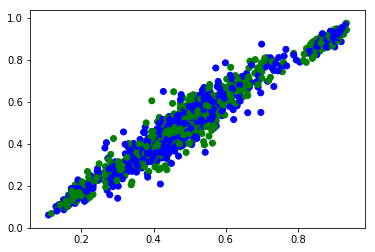

In [132]:
def costFunction(prediction):
    errCount = 0
    ndata=len(prediction)
    for i in range(ndata):
        if(not ((prediction[i]<0.5 and Yva[i]<0.5) or (prediction[i]>0.5 and Yva[i]>0.5))):
            errCount += 1
    print(errCount/float(ndata))

theta = [0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1]
X = [forest2PredictionTR, forestPredictionTR, gradientPrediction2TR, gradientPredictionTR, adaPredictionTR, logistic41PredictionTR, knn28PredictionTR, gradient13PredictionTR, gradient12PredictionTR, gradient23PredictionTR] 

colormap = np.array(['b','g'])
plt.scatter(gradientPrediction2TR, gradientPredictionTR,c =colormap[Ytr.astype("int64")])
plt.show()

In [ ]:
plt.plot()

In [121]:
def printFinalVaErr(finalPrediction):
    errCount = 0
    ndata=len(finalPrediction)
    for i in range(ndata):
        if(not ((finalPrediction[i]<0.5 and Yva[i]<0.5) or (finalPrediction[i]>0.5 and Yva[i]>0.5))):
            errCount += 1
    print(errCount/float(ndata))

In [122]:
printFinalVaErr(finalPredictionBESTtr)

0.330280172414


In [123]:
printFinalVaErr(finalPredictionTR)

0.330818965517


In [62]:
Y_test = np.vstack((np.arange(X_test.shape[0]), finalPrediction)).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('FinalPredictions.txt', Y_test, '%d, %.2f',header='ID,Predicted', delimiter=',')